## If in Colab

In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
in_colab = False
floatType = 32
last_data_idx = -1

In [3]:
import tensorflow as tf
if in_colab:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
if floatType == 16:
    tf.keras.backend.set_floatx('float16')

In [4]:
if in_colab:
    import sys
    data_dir = "/content/drive/MyDrive/data/"
    VOC2012_path = data_dir
    tracker_path = data_dir
    sys.path.append(tracker_path)
    ssd_weights_path = data_dir + "ssd_weights_epoch_0380.h5"
    checkpoint_filepath = data_dir + "weights/"
else:
    data_dir = "../data/"
    VOC2012_path = data_dir + "VOCdevkit/"
    tracker_path = "../Tracking_SSD_ReID/"
    ssd_weights_path = data_dir + "ssd_weights_epoch_0380.h5"
    checkpoint_filepath = data_dir + "segmentation_weights/"

## Import model

In [5]:
from models.FCN8 import FCN8
model = FCN8(tracker_ssd_path = tracker_path, 
             ssd_weights_path = ssd_weights_path,
             floatType = floatType,
             n_classes = 3)
model(tf.zeros((32,300,300,3))).shape

TensorShape([32, 300, 300, 3])

In [70]:
model_saved = tf.keras.models.load_model("../data/seg_2/")

In [21]:
from utils.eval import *

Calculated legend: size 33, (x, y) pos (200.4, 50)
New legend: size 20.8, (x, y) pos (250, 50)


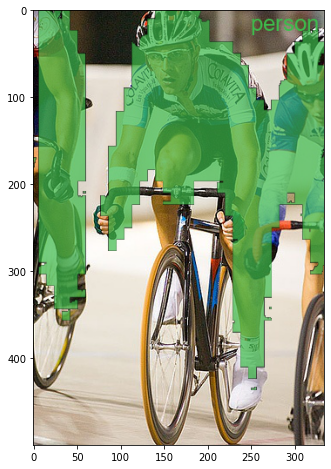

In [10]:
pltPredOnImg(model_saved, "../data/VOCdevkit/VOC2012/JPEGImages_forSeg/2007_000129.jpg",
             save_path="../data/results.png", classes = {2: "person"},
             legend_size=0.8, legend_xpos=250, legend_ypos=50)

In [66]:
video_path = "../data/video/person_dog.mp4"
out_path = "../data/video/"
pltPredOnVideo(model_saved, video_path, out_path + "person_dog_segmentation.gif",
               start_idx=60, end_idx=210, skip=2, legend_size=1.2,
               resize=(500,200), fps=22, input_shape=(300,300), classes = {1: "dog", 2: "person"})

 30%|███████████████████████▌                                                        | 62/210 [00:00<00:01, 108.94it/s]

Calculated legend: size 17, (x, y) pos (256.2, 20)
New legend: size 24.0, (x, y) pos (256.2, 20)


100%|████████████████████████████████████████████████████████████████████████████████| 210/210 [00:21<00:00,  9.57it/s]


In [71]:
video_path = "../data/video/dog_black.mp4"
out_path = "../data/video/"
pltPredOnVideo(model_saved, video_path, out_path + "dog_black_segmentation.gif",
               start_idx=50, end_idx=270, skip=2, legend_size=1.6, legend_xpos=20,
               resize=(500,200), fps=22, input_shape=(300,300), classes = {1: "dog", 2: "person"})

 19%|███████████████▌                                                                 | 52/270 [00:00<00:02, 73.08it/s]

Calculated legend: size 14, (x, y) pos (213.6, 20)
New legend: size 35.2, (x, y) pos (20, 20)


100%|████████████████████████████████████████████████████████████████████████████████| 270/270 [00:32<00:00,  8.29it/s]


In [72]:
video_path = "../data/video/dog.mp4"
out_path = "../data/video/"
pltPredOnVideo(model_saved, video_path, out_path + "dog_segmentation.gif",
               start_idx=0, end_idx=270, skip=2, legend_size=1.6, legend_xpos=20,
               resize=(500,200), fps=22, input_shape=(300,300), classes = {1: "dog", 2: "person"})

  1%|▌                                                                                 | 2/270 [00:00<00:43,  6.14it/s]

Calculated legend: size 14, (x, y) pos (213.6, 20)
New legend: size 35.2, (x, y) pos (20, 20)


100%|████████████████████████████████████████████████████████████████████████████████| 270/270 [00:42<00:00,  6.29it/s]


In [77]:
video_path = "../data/video/person_then_dog.mp4"
out_path = "../data/video/"
pltPredOnVideo(model_saved, video_path, out_path + "person_then_dog_segmentation.gif",
               start_idx=15, end_idx=230, skip=2, legend_size=1.6, legend_xpos=20,
               resize=(500,200), fps=22, input_shape=(300,300), classes = {1: "dog", 2: "person"})

  7%|█████▋                                                                           | 16/230 [00:00<00:04, 46.64it/s]

Calculated legend: size 17, (x, y) pos (256.2, 20)
New legend: size 43.2, (x, y) pos (20, 20)


100%|████████████████████████████████████████████████████████████████████████████████| 230/230 [00:34<00:00,  6.66it/s]


In [56]:
COLORS

[(89, 106, 62),
 (53, 165, 162),
 (182, 167, 193),
 (198, 96, 104),
 (148, 109, 173),
 (143, 107, 122),
 (146, 55, 113),
 (102, 98, 135),
 (110, 133, 173),
 (185, 149, 70),
 (105, 116, 50),
 (153, 74, 98),
 (170, 173, 108),
 (118, 142, 104),
 (136, 88, 78),
 (86, 126, 72),
 (155, 58, 151),
 (92, 109, 191),
 (106, 187, 54),
 (170, 150, 52),
 (83, 80, 127),
 (97, 106, 73),
 (103, 92, 196),
 (92, 120, 183),
 (180, 78, 101),
 (144, 159, 50),
 (84, 173, 137),
 (143, 133, 194),
 (184, 90, 151),
 (111, 78, 58),
 (167, 121, 133),
 (82, 103, 147),
 (56, 71, 126),
 (117, 171, 85),
 (195, 50, 166),
 (132, 148, 188),
 (103, 85, 109),
 (149, 105, 91),
 (83, 84, 73),
 (97, 148, 193),
 (191, 161, 123),
 (172, 194, 146),
 (144, 183, 169),
 (54, 106, 106),
 (183, 130, 159),
 (198, 71, 169),
 (96, 135, 189),
 (171, 126, 184),
 (159, 163, 188),
 (143, 70, 137),
 (137, 117, 150),
 (162, 183, 123),
 (110, 164, 128),
 (193, 135, 156),
 (143, 138, 152),
 (84, 50, 158),
 (111, 132, 124),
 (54, 99, 162),
 (123